In [25]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob

In [26]:
data_dir = 'C:/data2/dg'
cue = np.load(data_dir+'/bp/cue.npy')

raw_finger=[]
for i in range(5):
    finger = np.load(data_dir+'/bp/finger'+str(i)+'.npy')
    raw_finger.append(finger)

{'start': {0: (array([ 19079,  39079,  43079,  47079,  91079, 103079, 111079, 123079,
       175079, 207079, 211079, 243079, 275079, 279079, 287079, 315079,
       339079, 343079, 367079, 399079, 439079, 495079, 499079, 515079,
       535079, 539079, 543079, 551079, 559079, 579079], dtype=int64),), 1: (array([ 27079,  55079,  67079,  79079,  83079,  87079, 131079, 143079,
       163079, 183079, 199079, 227079, 235079, 239079, 263079, 283079,
       319079, 335079, 347079, 379079, 403079, 407079, 427079, 435079,
       503079, 519079, 567079, 587079, 591079, 595079], dtype=int64),), 2: (array([ 31079,  63079,  71079,  99079, 115079, 119079, 135079, 159079,
       167079, 187079, 191079, 203079, 215079, 223079, 251079, 259079,
       271079, 303079, 311079, 327079, 351079, 355079, 371079, 375079,
       391079, 395079, 411079, 507079, 523079, 575079], dtype=int64),), 3: (array([ 35079,  59079,  95079, 107079, 127079, 151079, 155079, 171079,
       231079, 255079, 267079, 291079, 295079, 

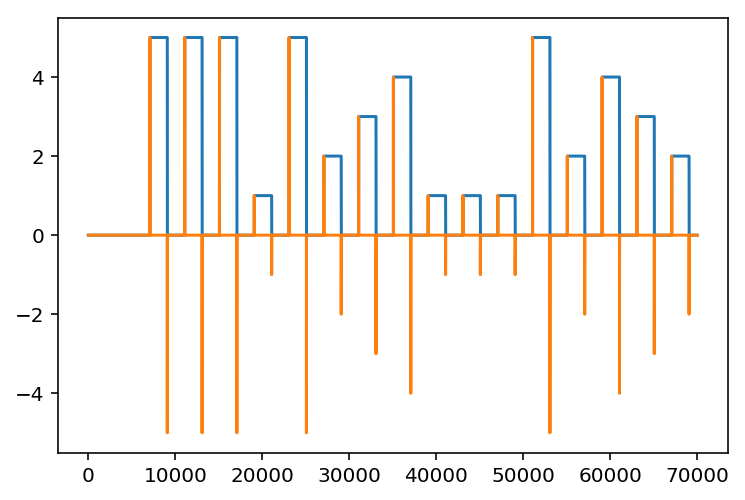

In [27]:
xx=np.diff(cue)
c={'start':{},'end':{}}
c['start']={0:[],1:[],2:[],3:[],4:[]}
c['end']={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
    c['start'][i] = np.where(xx==i+1)
    c['end'][i] = np.where(xx==-i-1)

plt.plot(cue[:70000])
plt.plot(xx[:70000])
print (c)

# Example start movement detection

In [28]:
example = raw_finger[2][:70000]

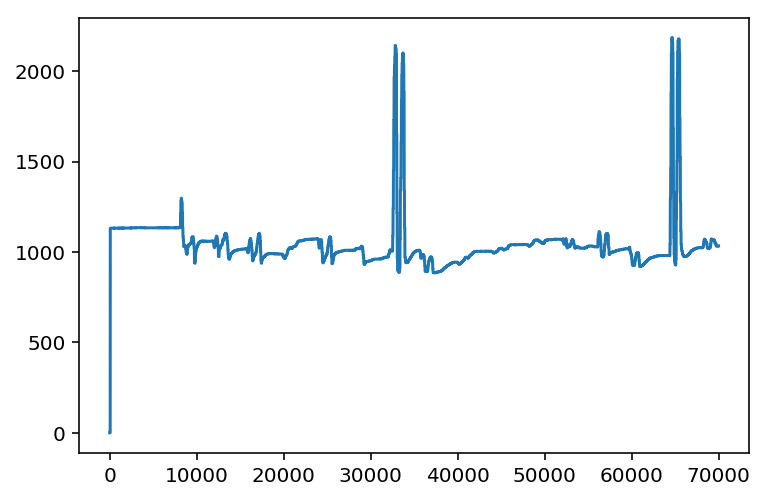

In [29]:
plt.plot(example)

(0, 700)

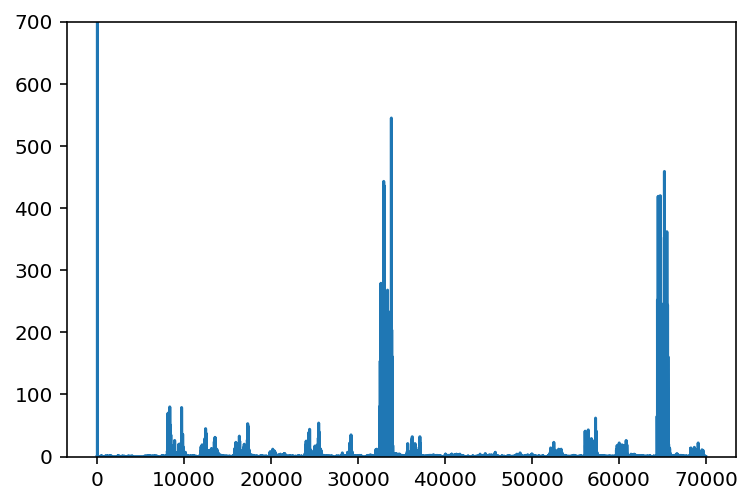

In [30]:
e_deriv = np.abs(np.diff(example))
plt.plot(e_deriv)
plt.ylim((0,700))

(0, 700)

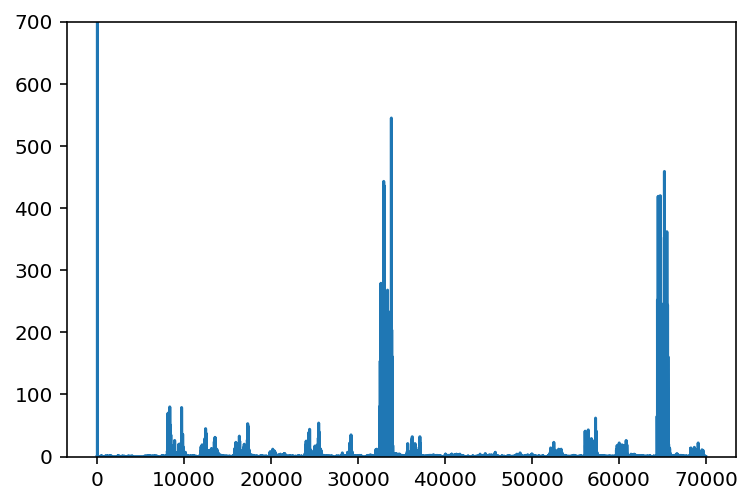

In [31]:
finger0_deriv = np.abs(np.diff(raw_finger[0]))
plt.plot(e_deriv)
plt.ylim((0,700))

In [32]:
#finger0_deriv = np.abs(np.diff(finger0))
#thresh = 50
#is_moving_finger0 = finger0_deriv > thresh
#move_samples_finger0 = np.argwhere(is_moving==1).transpose()[0]
#move_samples_diff_finger0 = np.diff(move_samples_finger0)

A function for calculating the 

In [33]:
def fingerStartEnd (finger):
    all_start_samps = []
    all_end_samps = []

    finger_deriv = np.abs(np.diff(finger))
    thresh = 50
    is_moving = finger_deriv > thresh
    move_samples = np.argwhere(is_moving==1).transpose()[0]
    move_samples_diff = np.diff(move_samples)

    all_start_samps.append(move_samples[0])
    time_thresh = 1000

    N_samps = len(move_samples)
    for i in range(1,N_samps):
        if move_samples_diff[i-1] > time_thresh:
            all_start_samps.append(move_samples[i])
            all_end_samps.append(move_samples[i-1])
    all_end_samps.append(move_samples[-1])
    return all_start_samps, all_end_samps

{0: [39, 19879, 40079, 44119, 48199, 91919, 103959, 112199, 123999, 176119, 208079, 211919, 243959, 276279, 280479, 288519, 315799, 319959, 340039, 344199, 347599, 367959, 400039, 439999, 496959, 499879, 515879, 536039, 539679, 542439, 544119, 552159, 559919, 579959, 595959], 1: [39, 20359, 28239, 32679, 56079, 64759, 68119, 72839, 80119, 84119, 86879, 97119, 100759, 105039, 113639, 116279, 120439, 132159, 136639, 144199, 164079, 168639, 184159, 199959, 216999, 221399, 225039, 228079, 235959, 239999, 245359, 249079, 252639, 260759, 264079, 272519, 284319, 304559, 311719, 319959, 329319, 336159, 339999, 341119, 345159, 347879, 351959, 356559, 372519, 376879, 380079, 392079, 396239, 405279, 408079, 412399, 416799, 421079, 427999, 432999, 435959, 441279, 443959, 449039, 456519, 476319, 480039, 485759, 496439, 500119, 504079, 509559, 519999, 524439, 540519, 549039, 565439, 568159, 571879, 575839, 580839, 588079, 592039, 595639, 600959], 2: [39, 8119, 9719, 17319, 25479, 32519, 57319, 64399

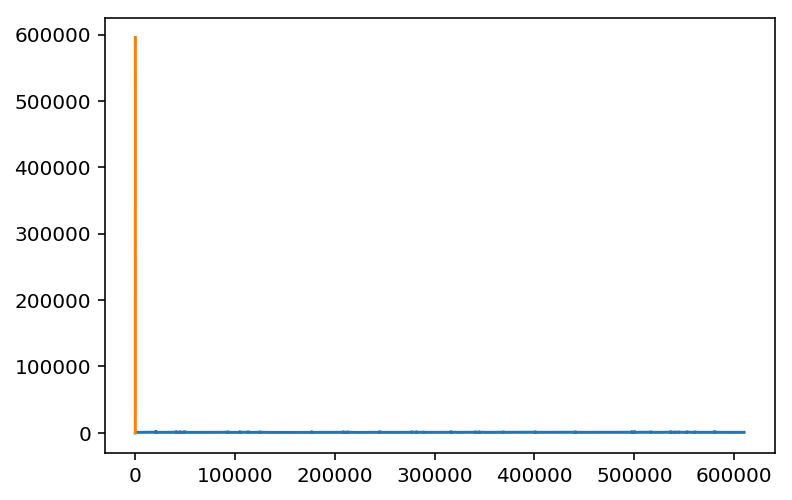

In [34]:
fingers={'start':{},'end':{}}
fingers['start']={0:[],1:[],2:[],3:[],4:[]}
fingers['end']={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
    fingers['start'][i],fingers['end'][i] = fingerStartEnd(raw_finger[i])
print(fingers['start'])
plt.plot(raw_finger[0])
plt.plot(fingers['start'][0])

(0, 70000)

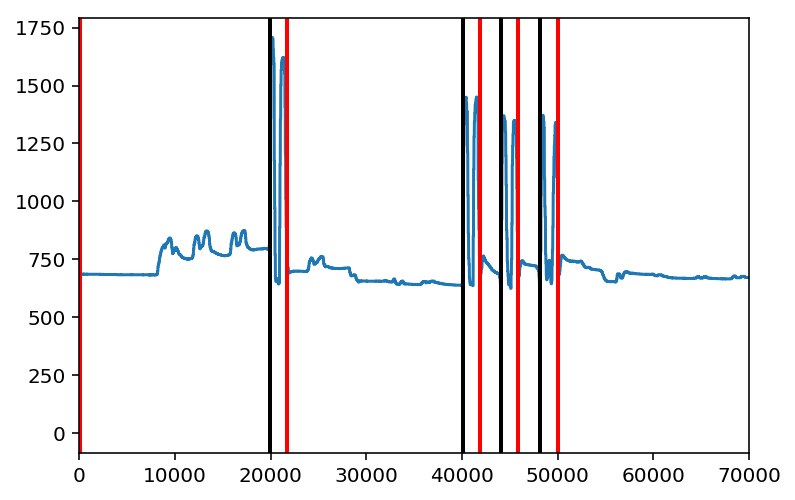

In [35]:
plt.plot(raw_finger[0])
for i,j in zip(fingers['start'][0],fingers['end'][0]):
    plt.axvline(x=i, ymin=0, ymax = 3000, linewidth=2, color='k')
    plt.axvline(x=j, ymin=0, ymax = 3000, linewidth=2, color='r')
plt.xlim(0,70000)


Plot the start and end for five fingers.

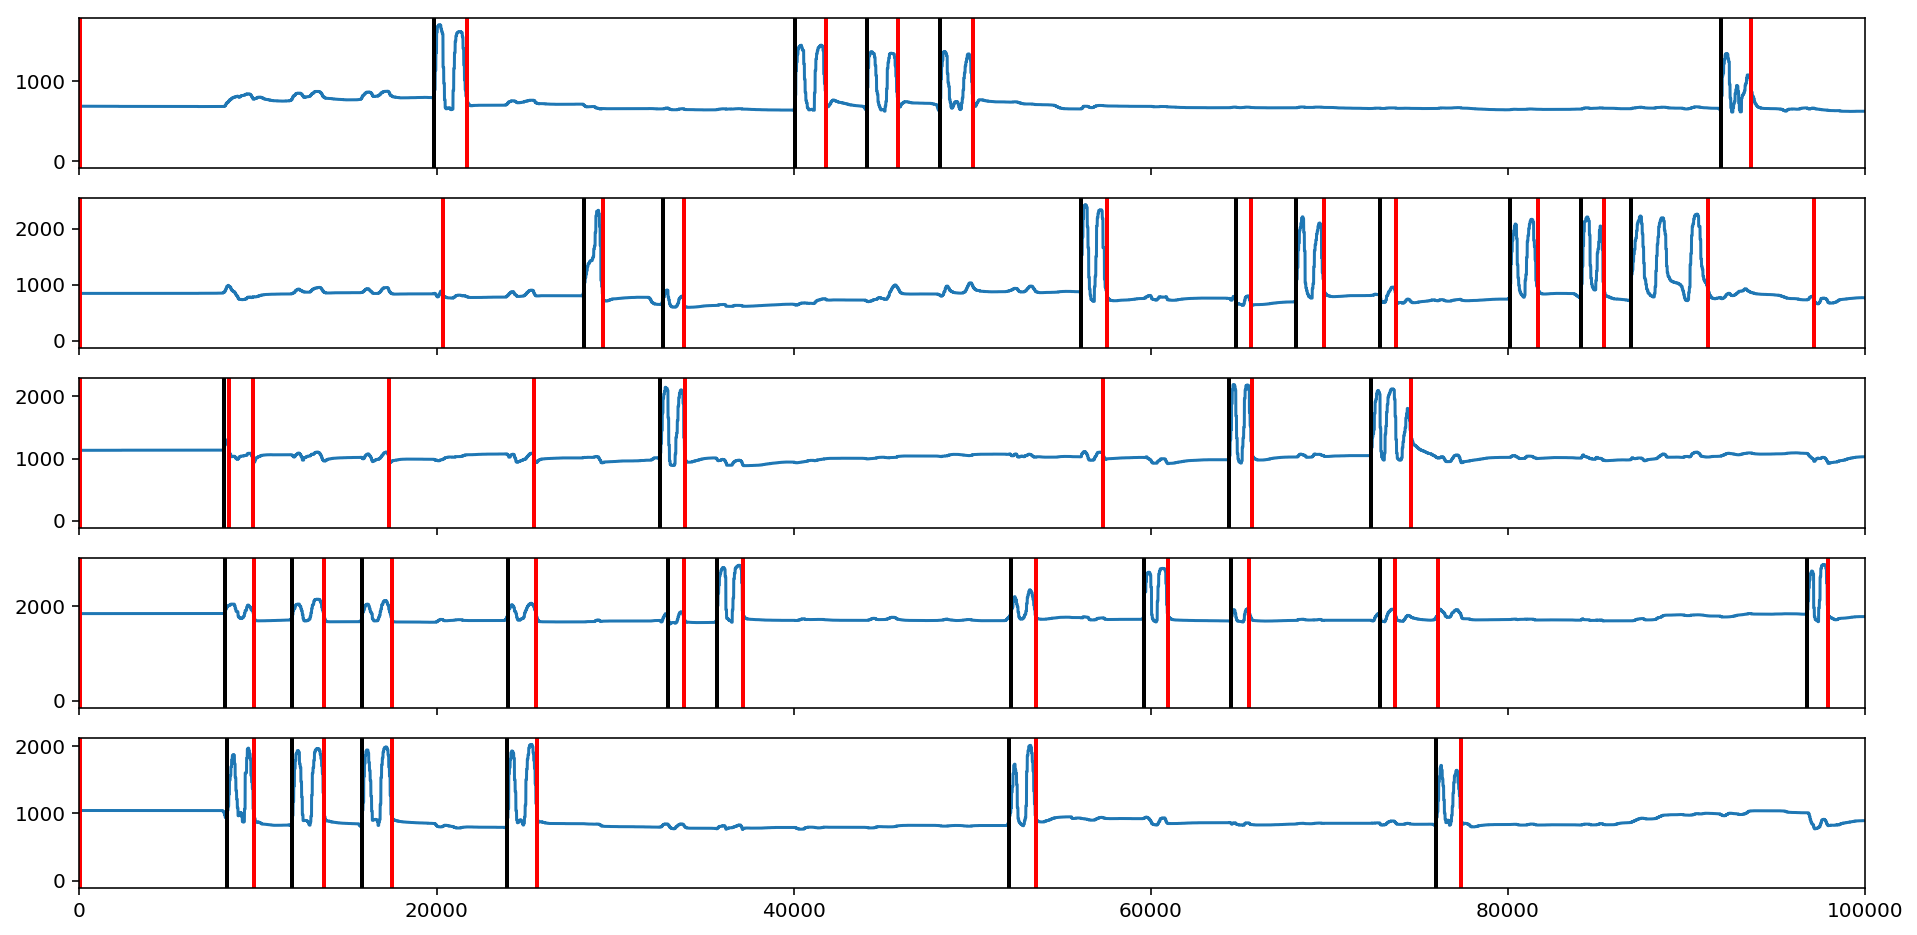

In [39]:
plt.figure(figsize=(16,8))
f, sub = plt.subplots(5, sharex=True,figsize=(16,8))
for k in range(5):
    sub[k].plot(raw_finger[k])
    for i,j in zip(fingers['start'][k],fingers['end'][k]):
        sub[k].axvline(x=i, ymin=0, ymax = 3000, linewidth=2, color='k')
        sub[k].axvline(x=j, ymin=0, ymax = 3000, linewidth=2, color='r')
    plt.xlim(0,100000)


